In [46]:
# import dependency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Remove the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the dataset
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess the data

In [4]:
# check the shape of dataset
df.shape

(891, 12)

In [5]:
# column names
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
#Check the types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Check the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# The cabin column has more null values so we drop it 
#Drop the PassengerId column because no need in future
df=df.drop(columns={"Cabin","PassengerId"})

In [9]:
#Fill the missing values of age
df["Age"]=df["Age"].fillna(df["Age"].mean())

df['Embarked']=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Change the data type following column  
**Survived (Category)**  
**PClass (Category)**  
**Sex (Category)**  
**Age (int)**  
**Embarked (Category)**

In [11]:
df["Survived"]=df["Survived"].astype("category")
df["Pclass"]=df["Pclass"].astype("category")
df["Sex"]=df["Sex"].astype("category")
df["Age"]=df["Age"].astype("int")
df["Embarked"]=df["Embarked"].astype("category")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(2), object(2)
memory usage: 42.4+ KB


In [13]:
#Get the five point summary
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# Univariate Analysis

In [14]:
#Check the how many people are alived
df["Survived"].value_counts().values[1]

342

Out of 891  62'%' people died in the accident


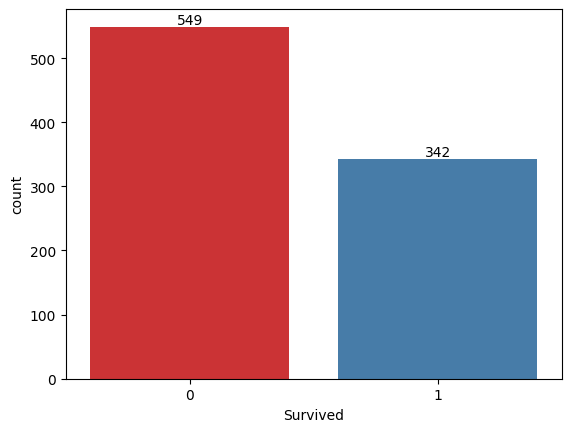

In [15]:
# Check the how many people are alive 
ax=sns.countplot(data=df,x="Survived",palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
percentage=round((df["Survived"].value_counts().values[0]/891)*100)
print(f"Out of 891  {percentage}'%' people died in the accident".format(percentage))
plt.show()

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


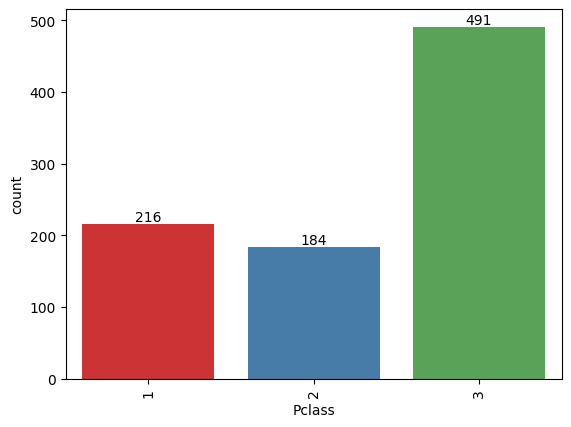

In [16]:
# Pclass
print((df["Pclass"].value_counts()/891)*100)
ax=sns.countplot(data=df,x="Pclass",palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


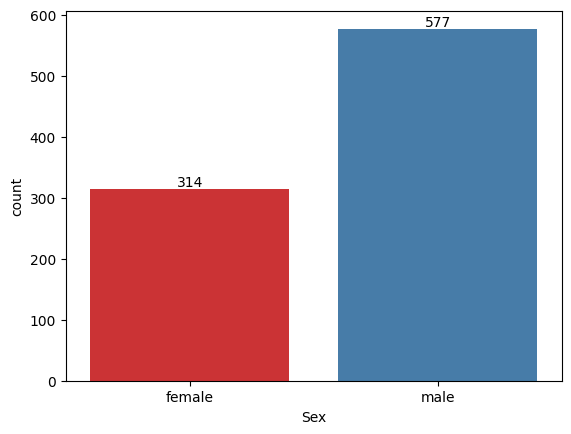

In [17]:
# Sex column
print(df["Sex"].value_counts())
ax=sns.countplot(data=df,x="Sex",palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

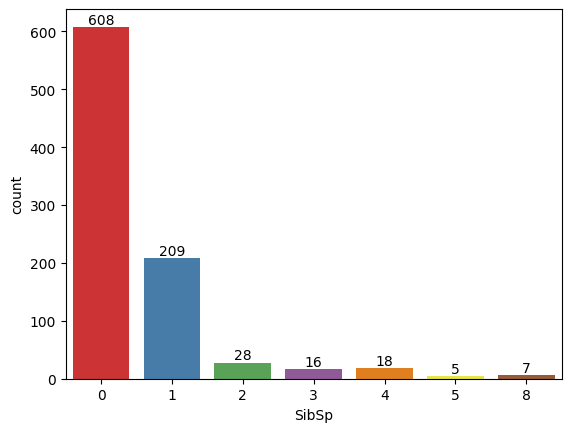

In [18]:
ax=sns.countplot(data=df,x='SibSp',palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


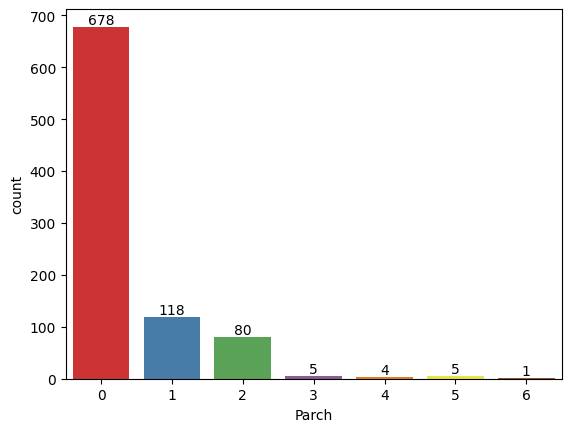

In [19]:
print((df['Parch'].value_counts()/891)*100)
ax=sns.countplot(data=df,x='Parch',palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

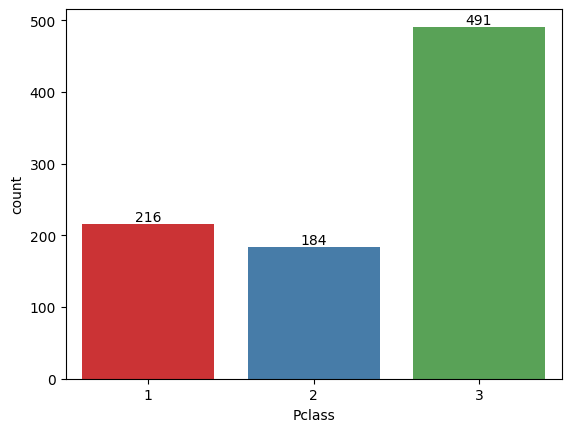

In [20]:
# Assuming df is your DataFrame and 'Pclass' is the column you're plotting
ax = sns.countplot(data=df, x='Pclass', palette='Set1')
# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()


Embarked
S    72.50
C    18.86
Q     8.64
Name: count, dtype: float64


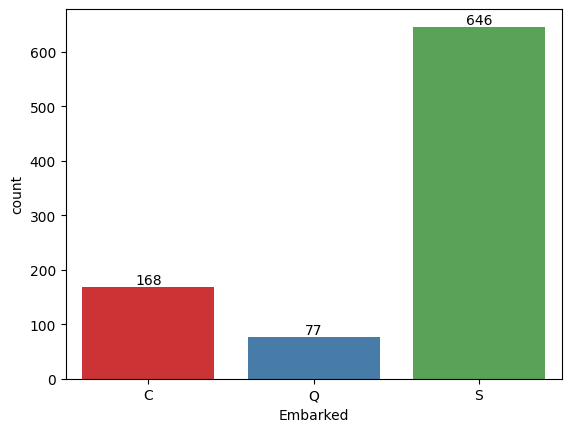

In [21]:
#Embarked column
percentage=(df["Embarked"].value_counts()/891)*100
print(percentage.round(2))
ax=sns.countplot(data=df,x="Embarked",palette="Set1")

#Add the label to each bar
for container in ax.containers:
    ax.bar_label(container)
plt.show()
    


Skew  0.45956263424701577
Kurt  0.9865867453652877


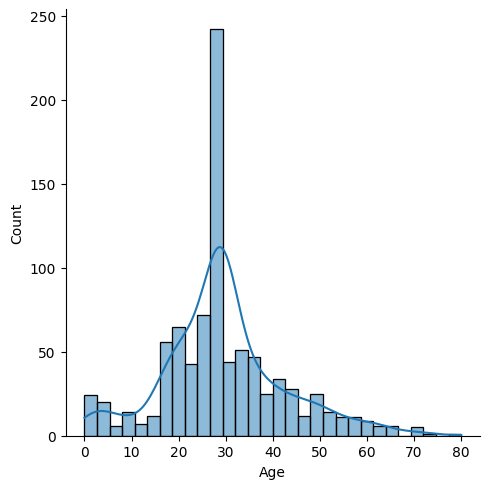

In [22]:
#Age column
ax=sns.displot(data=df,x="Age",kde=True)
print("Skew ",df["Age"].skew())
print("Kurt ",df["Age"].kurt())

plt.show()

In [23]:
#Check the curisity of data
print("People with age in between 60 and 70 are",df[(df['Age']>60) & (df["Age"]<70)].shape[0])
print("People with age  >= 70 and <=75 are ",df[(df["Age"]>=70) & (df["Age"]<=75)].shape[0])
print("People with age  > 75 are ",df[df["Age"]>70].shape[0])
print ("People with age b/w 0 to 1 are ",df[df["Age"]<1].shape[0])

People with age in between 60 and 70 are 15
People with age  >= 70 and <=75 are  6
People with age  > 75 are  4
People with age b/w 0 to 1 are  7


skew 4.787316519674893
kurt 33.39814088089868


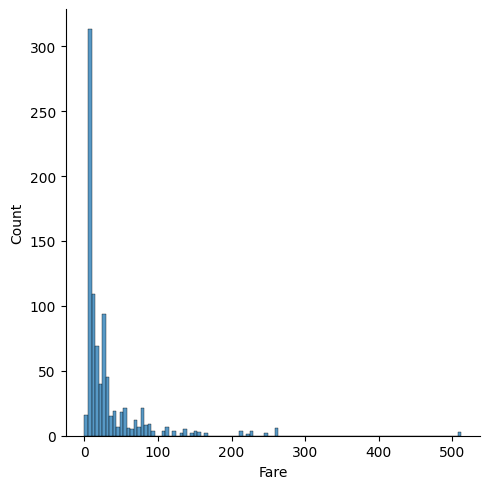

In [24]:
#Fare column
ax=sns.displot(data=df,x="Fare")
print("skew",df["Fare"].skew())
print("kurt",df["Fare"].kurt())

<Axes: xlabel='Fare'>

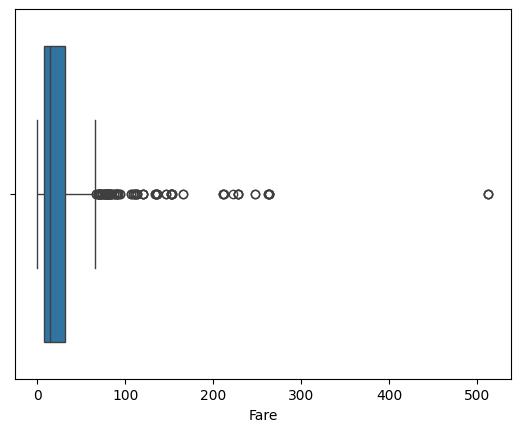

In [25]:
sns.boxplot(data=df,x="Fare")

# Multivarient analysis

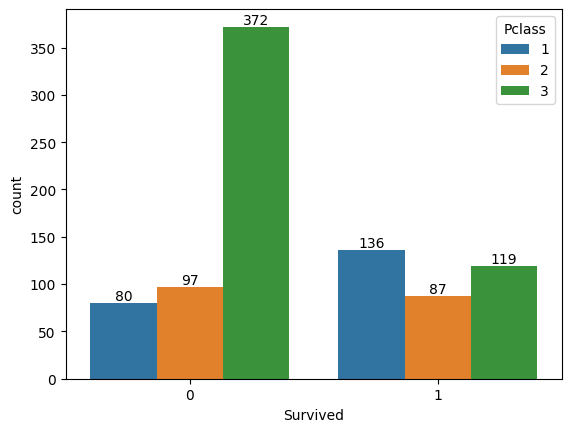

In [26]:
ax=sns.countplot(data=df,x="Survived",hue="Pclass")
pd.crosstab(df["Pclass"],df["Survived"]).apply(lambda r: round((r/r.sum())*100,1),axis=1)
for container in ax.containers:
    ax.bar_label(container)



Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


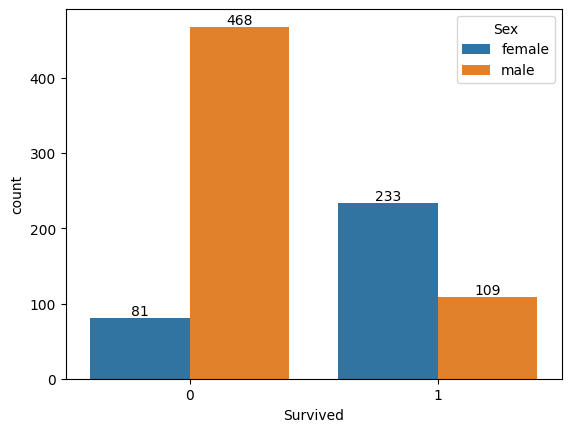

In [27]:
#Survived with  sex
ax=sns.countplot(data=df,x="Survived",hue="Sex")
for container in ax.containers:
    ax.bar_label(container)
pd.crosstab(df["Sex"],df["Survived"]).apply(lambda r: round((r/r.sum())*100,1),axis=1)


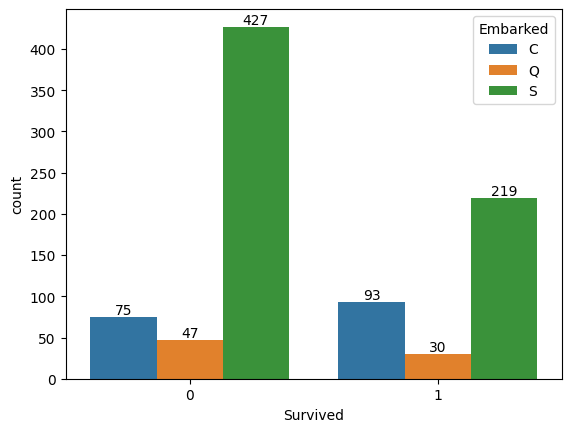

In [28]:
#Survived with Embarked columns
ax=sns.countplot(data=df,x="Survived",hue="Embarked")

for i in ax.containers:
    ax.bar_label(i)


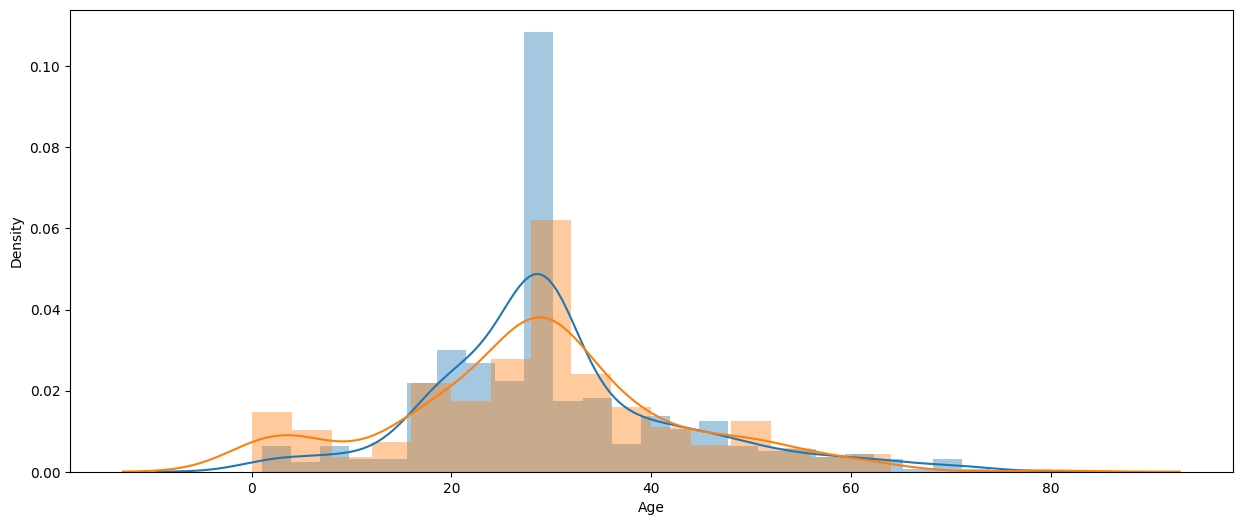

In [29]:
# Survived with age
plt.figure(figsize=(15,6))
sns.distplot(df[df["Survived"]==0]["Age"])
sns.distplot(df[df["Survived"]==1]["Age"])
plt.show()

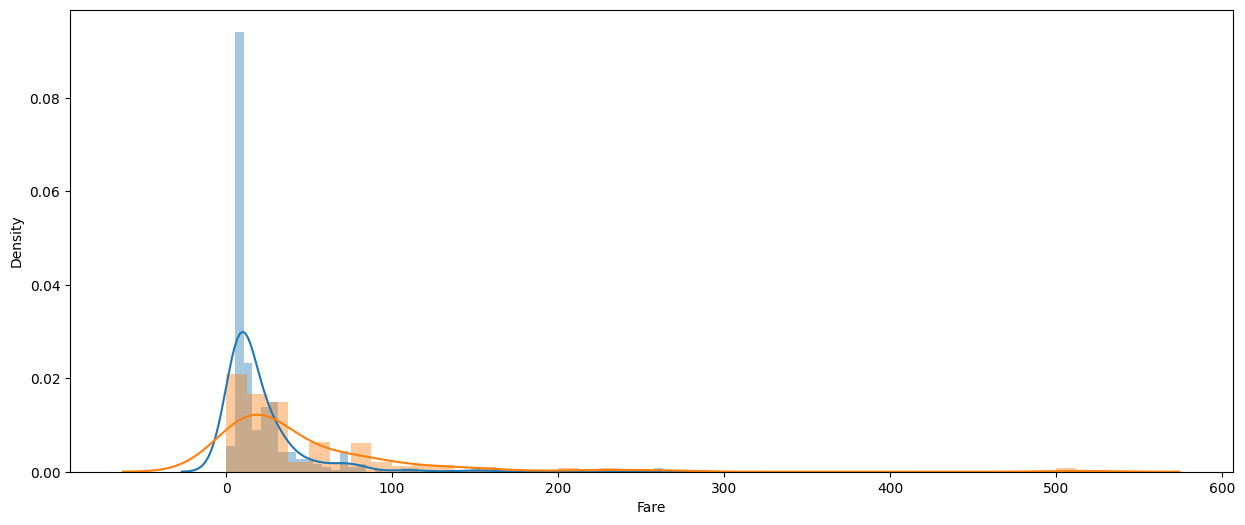

In [30]:
#Survived with fare

plt.figure(figsize=(15,6))
sns.distplot(df[df["Survived"]==0]["Fare"])
sns.distplot(df[df["Survived"]==1]["Fare"])
plt.show()

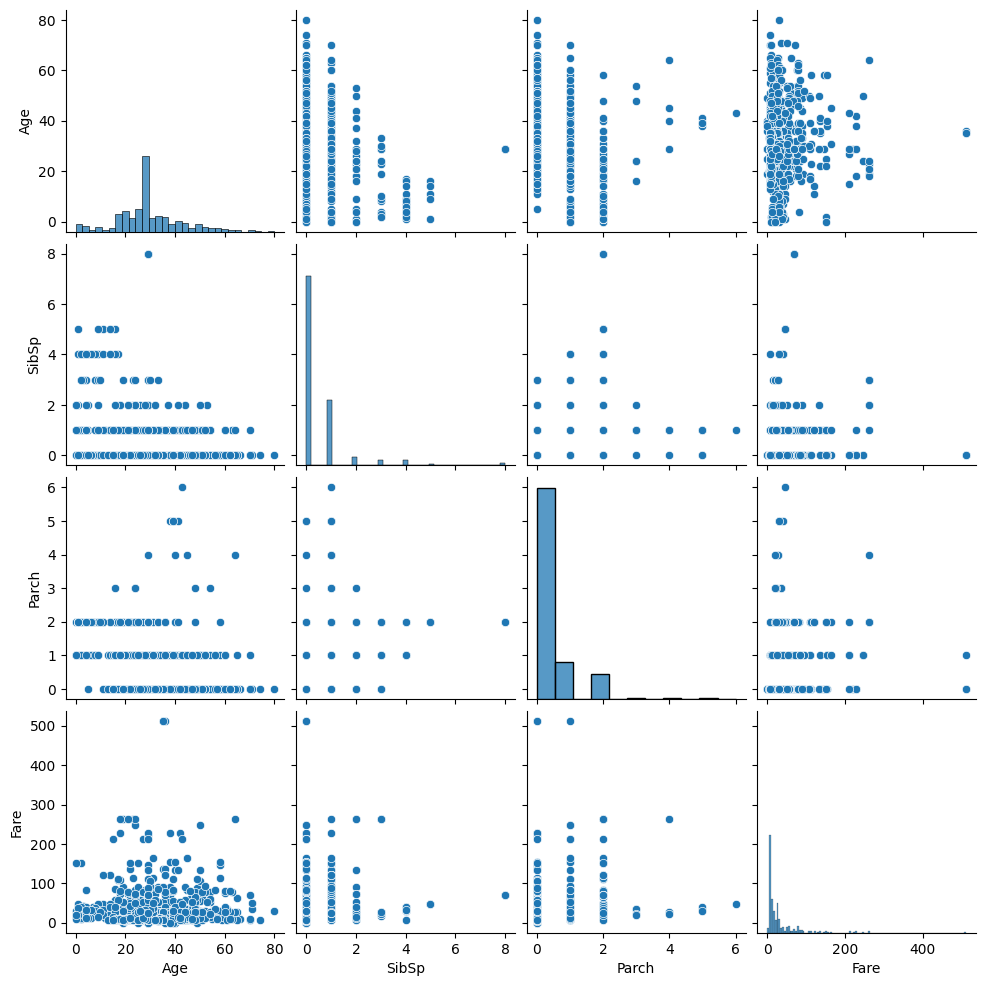

In [31]:
#Pairplot with all columns
sns.pairplot(df)
plt.show()


<Axes: >

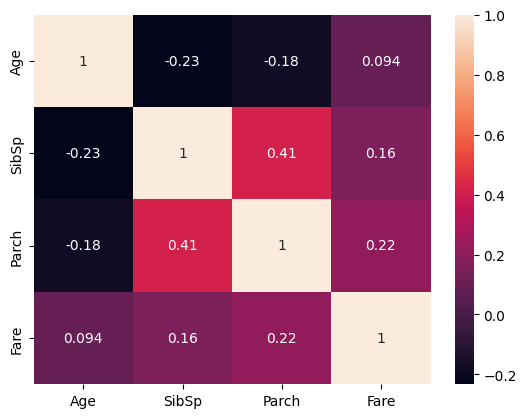

In [32]:
dfs = df.select_dtypes(include=np.number)
sns.heatmap(dfs.corr(),annot=True)

# Feature engineering

In [33]:

# create new column by the name of faimly which will be the sum of sibsp and parch column
df["Faimly_size"]=df["Parch"]+df["SibSp"]

In [34]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faimly_size
478,0,3,"Karlsson, Mr. Nils August",male,22,0,0,350060,7.5208,S,0
681,1,1,"Hassab, Mr. Hammad",male,27,0,0,PC 17572,76.7292,C,0
407,1,2,"Richards, Master. William Rowe",male,3,1,1,29106,18.7500,S,2
591,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52,1,0,36947,78.2667,C,1
635,1,2,"Davis, Miss. Mary",female,28,0,0,237668,13.0000,S,0


In [35]:
# Now we will engineer a new feature by the name of family type
def Family_member(number):
    if number==0:
        return "Alone"
    elif number >0 and number <=4:
        return "Medium"
    else:
        return "Large"

In [36]:
df["Family_member"]=df["Faimly_size"].apply(Family_member)

In [37]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faimly_size,Family_member
440,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45,1,1,F.C.C. 13529,26.2500,S,2,Medium
76,0,3,"Staneff, Mr. Ivan",male,29,0,0,349208,7.8958,S,0,Alone
125,1,3,"Nicola-Yarred, Master. Elias",male,12,1,0,2651,11.2417,C,1,Medium
621,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42,1,0,11753,52.5542,S,1,Medium
59,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9000,S,7,Large


In [38]:
#Drop the same column Parch,sibsp and family size
df.drop(columns=["SibSp","Parch","Faimly_size"],inplace=True)

In [39]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_member
858,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24,2666,19.2583,C,Medium
293,0,3,"Haas, Miss. Aloisia",female,24,349236,8.8500,S,Alone
631,0,3,"Lundahl, Mr. Johan Svensson",male,51,347743,7.0542,S,Alone
875,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,2667,7.2250,C,Alone
852,0,3,"Boulos, Miss. Nourelain",female,9,2678,15.2458,C,Medium


In [40]:
# Check the survival possibility with the family
pd.crosstab(df["Family_member"],df["Survived"]).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
Family_member,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


# Detect outliers

In [41]:
# If data is following normal distribution anything beyond 3SD - mean +3SD can be consider as outlier
df=df[df["Age"]<(df["Age"].mean()+3*df["Age"].std())]
#If data does not  follow normal distribution,using box plot we can eliminate points beyond Q1 -1.5IQR and Q3+1.5IQR
Q1=np.percentile(df["Fare"],25)
Q3=np.percentile(df["Fare"],75)

outlier_low=Q1-1.5*(Q3-Q1)
outlier_higher=Q3+1.5*(Q3-Q1)

df=df[(df["Fare"]>outlier_low) & (df["Fare"]<outlier_higher)]

In [42]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_member
108,0,3,"Rekic, Mr. Tido",male,38,349249,7.8958,S,Alone
345,1,2,"Brown, Miss. Amelia ""Mildred""",female,24,248733,13.0000,S,Alone
690,1,1,"Dick, Mr. Albert Adrian",male,31,17474,57.0000,S,Medium
868,0,3,"van Melkebeke, Mr. Philemon",male,29,345777,9.5000,S,Alone
680,0,3,"Peters, Miss. Katie",female,29,330935,8.1375,Q,Alone


In [43]:
# One hot encoding
from sklearn.preprocessing import LabelEncoder
for i in df:
    
    df[i]=LabelEncoder().fit_transform(df[i])

df
#We use the one hot encoding
#pd.get_dummies(data=df,columns=["Pclass","Sex","Embarked","Family_member"],drop_first=True)


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_member
0,0,2,91,1,22,492,18,2,2
2,1,2,294,0,26,615,41,2,0
3,1,0,227,0,35,41,188,2,2
4,0,2,14,1,35,441,43,2,0
5,0,2,476,1,29,252,51,1,0
...,...,...,...,...,...,...,...,...,...
886,0,1,470,1,27,80,85,2,0
887,1,0,254,0,19,11,153,2,0
888,0,2,346,0,29,621,131,2,2
889,1,0,68,1,26,5,153,0,0


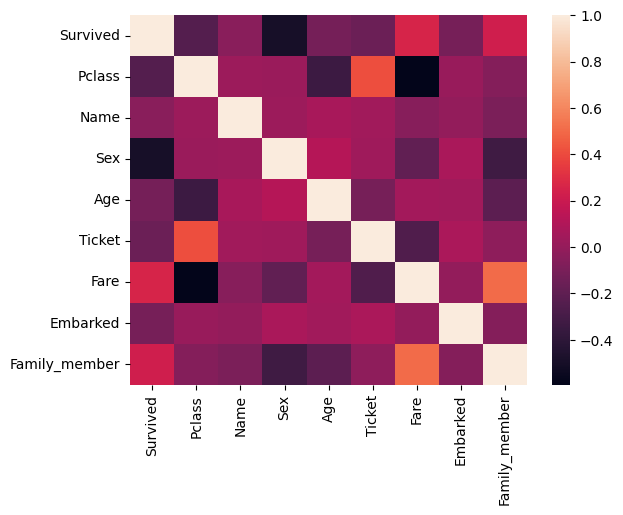

In [44]:

sns.heatmap(df.select_dtypes(include="number").corr())
plt.show()

<Axes: >

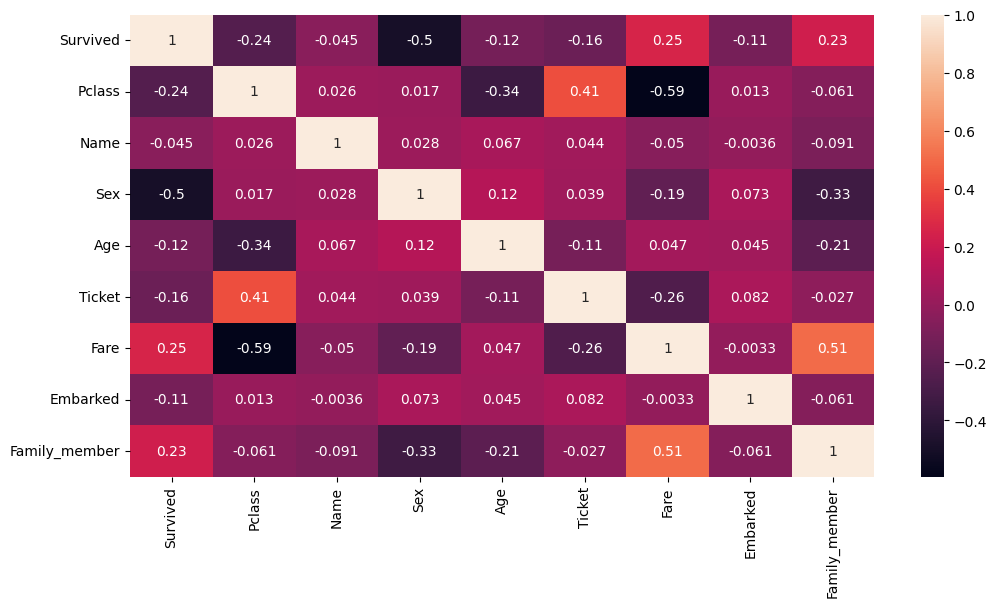

In [45]:
plt.figure(figsize=(12,6))
dfs = df.select_dtypes(include=np.number)
sns.heatmap(dfs.corr(),annot=True)